In [1]:
import pandas as pd
path = 'https://raw.githubusercontent.com/datasethub/ds105/master/Model_Dataset_Lab.csv'
df = pd.read_csv(path)

In [2]:
df

,Unnamed: 0,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,drive-wheels,price
0,23,1967,90,0.755887,0.886111,68.0,31,38,93.7,2.97,fwd,6229.0
1,4,2824,136,0.848630,0.922222,115.0,18,22,99.4,3.19,4wd,17450.0
2,129,2695,121,0.896684,0.923611,110.0,21,28,99.1,3.54,fwd,12170.0
3,83,2405,122,0.828448,0.908333,88.0,25,32,96.3,3.35,fwd,8189.0
4,154,2275,110,0.799135,0.894444,56.0,34,36,95.7,3.27,fwd,7898.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,167,2714,146,0.846708,0.911111,116.0,24,30,98.4,3.62,rwd,11549.0
176,102,3139,181,0.820279,0.943056,200.0,17,23,91.3,3.43,rwd,19699.0
177,94,2037,97,0.817876,0.886111,69.0,31,37,94.5,3.15,fwd,7999.0
178,193,3042,141,0.907256,0.933333,114.0,24,28,104.3,3.78,rwd,16515.0


## Hoồi quy tuyến tính đơn biến

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
m1 = LinearRegression()

In [83]:
X = df[['highway-mpg']]
y = df['price']

In [84]:
m1.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [16]:
f = lambda hm: m1.intercept_ + m1.coef_[0] * hm

In [15]:
m1.coef_

array([-845.83672401])

In [17]:
X

,highway-mpg
0,38
1,22
2,28
3,32
4,36
...,...
175,30
176,23
177,37
178,28


In [18]:
f(27)

np.float64(16245.4238855695)

In [19]:
df[['highway-mpg','price']]

,highway-mpg,price
0,38,6229.0
1,22,17450.0
2,28,12170.0
3,32,8189.0
4,36,7898.0
...,...,...
175,30,11549.0
176,23,19699.0
177,37,7999.0
178,28,16515.0


In [20]:
m1.predict([[27]])

C:\Users\phatlt17420\PycharmProjects\JupyterProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16245.42388557])

In [21]:
import numpy as np

In [24]:
m1.predict(np.array([[27]))

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (902783506.py, line 1)

## Hồi quy đa biến

In [39]:
from sklearn.linear_model import (LinearRegression) # import thư viện

In [26]:
m2 =LinearRegression()

In [30]:
X = df[['horsepower','curb-weight','engine-size','highway-mpg']]
y = df['price']

In [38]:
m2.fit(X,y) # chạy để tạo mô hình

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [32]:
m2.coef_

array([46.31113134,  4.92709318, 82.78420228, 29.03220964])

In [33]:
m2.intercept_

np.float64(-15629.377814761352)

In [34]:
f = lambda h1,h2,h3,h4: m2.intercept_ + m2.coef_[0] * h1 + m2.coef_[1] * h2 + m2.coef_[2] * h3 + m2.coef_[3] * h4

In [35]:
df[['horsepower','curb-weight','engine-size','highway-mpg','price']]

,horsepower,curb-weight,engine-size,highway-mpg,price
0,68.0,1967,90,38,6229.0
1,115.0,2824,136,22,17450.0
2,110.0,2695,121,28,12170.0
3,88.0,2405,122,32,8189.0
4,56.0,2275,110,36,7898.0
...,...,...,...,...,...
175,116.0,2714,146,30,11549.0
176,200.0,3139,181,23,19699.0
177,69.0,2037,97,37,7999.0
178,114.0,3042,141,28,16515.0


In [36]:
f(68,1967,90,38)

np.float64(5765.173577233249)

## Dùng trực quan để đánh giá mô hình

In [43]:
import seaborn as sns

<Axes: xlabel='highway-mpg', ylabel='price'>

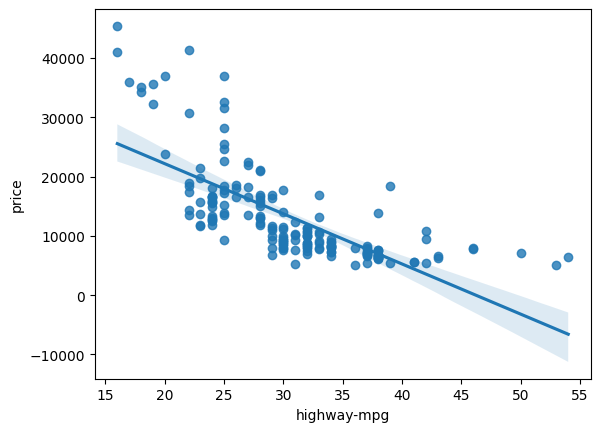

In [45]:
sns.regplot(x='highway-mpg', y = 'price', data = df)

<Axes: xlabel='highway-mpg', ylabel='price'>

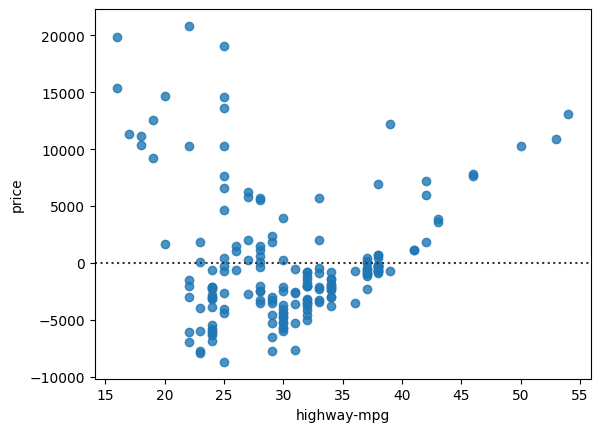

In [48]:
sns.residplot(data=df, x='highway-mpg', y='price') #biểu đồ thiện residual (e) của giá (phần dư)

In [50]:
import matplotlib.pyplot as plt

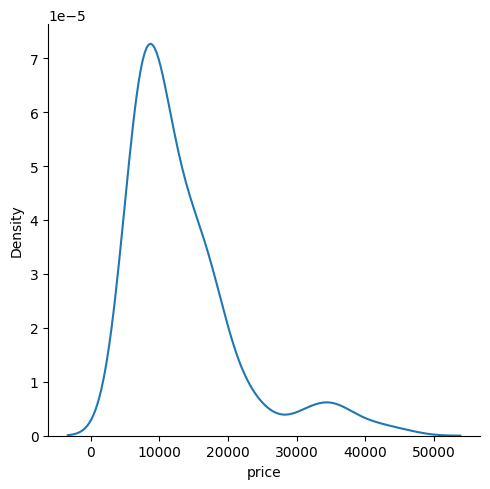

In [56]:
sns.displot(data=df, x='price', kind='kde')

In [57]:
yHatPrice = m2.predict(X)

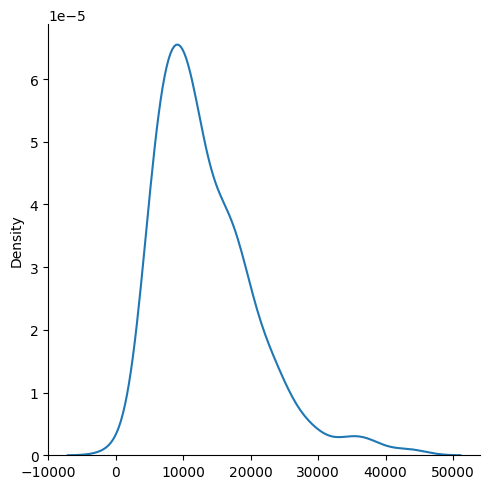

In [58]:
sns.displot(x=yHatPrice, kind='kde')

In [85]:
m1 = LinearRegression()
X = df[['highway-mpg']]
y = df['price']
m1.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [82]:
sns.kdeplot(y_hat,ax=ax2)

<Axes: xlabel='price', ylabel='Density'>

In [94]:
m3 = LinearRegression()
X = df[['curb-weight','engine-size','length','width','horsepower','city-mpg','highway-mpg','wheel-base','bore']]
y = df['price']


In [95]:
m3.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


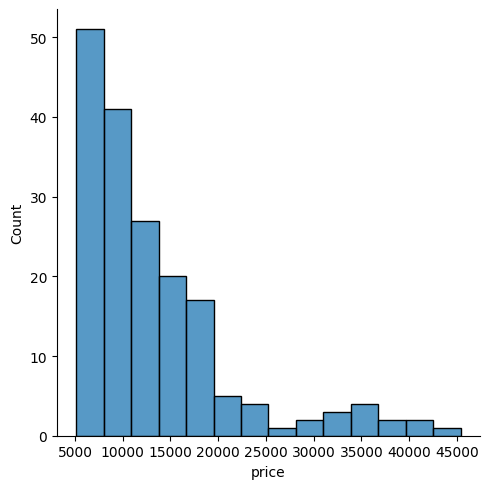

In [96]:
ax3 = sns.displot(data=df, x='price')

In [97]:
yHatPrice3 = m3.predict(X)

<Axes: xlabel='price', ylabel='Density'>

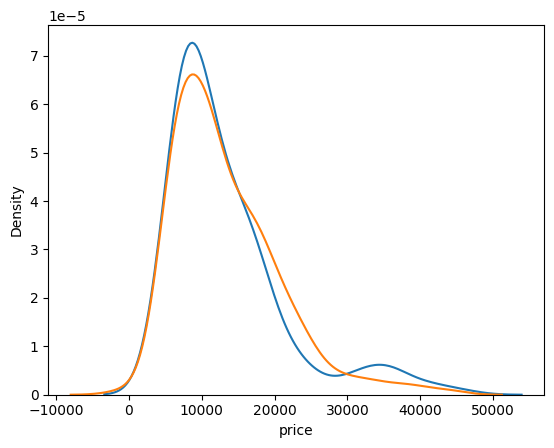

In [102]:
sns.kdeplot(data=df['price'])

# Vẽ phân phối dự báo từ m3 (Màu xanh)
sns.kdeplot(yHatPrice3)

In [103]:
residuals = df['price'] - yHatPrice3

<Axes: ylabel='price'>

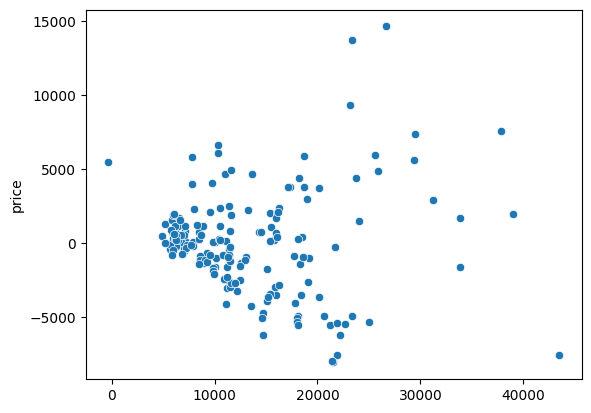

In [105]:
sns.scatterplot(x=yHatPrice3, y=residuals)

In [ ]:
One-Hot Encoding (Tạo biến giả - Dummy Variables)